In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


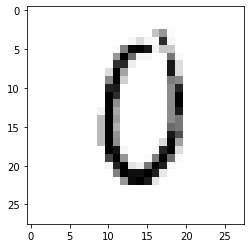

0
2


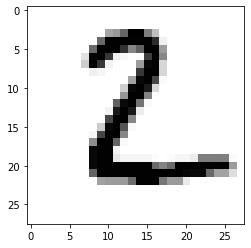

In [ ]:
plt.imshow(training_images[232], cmap='Greys')
plt.show()
print(training_labels[232])
plt.imshow(test_images[1], cmap='Greys')
print(test_labels[1])
plt.show()

In [ ]:
print(training_images[0].shape)

(28, 28)


In [ ]:
training_images_reshaped=training_images.reshape(60000, 28, 28, 1)
training_images_reshaped=training_images_reshaped / 255.0
test_images_reshaped = test_images.reshape(10000, 28, 28, 1)
test_images_reshaped=test_images_reshaped / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
  tf.keras.layers.MaxPooling2D(3, 3),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(40, (2, 2), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(training_images_reshaped, training_labels, epochs=5)

test_loss, test_accuracy = model.evaluate(test_images_reshaped, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

**Sauvegarder le modèle CNN**

0


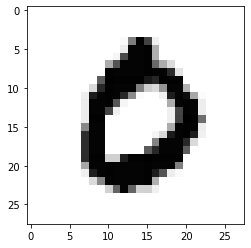

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


In [ ]:
plt.imshow(test_images[3], cmap='Greys')
print(test_labels[3])
plt.show()
y_pred = model.predict(test_images[3].reshape(1, 28, 28, 1), batch_size=10)
print(y_pred)
classes2 = np.argmax(y_pred, axis=1)
print(classes2)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from PIL import Image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path)
  img = img.resize((28,28))
  im2arr = np.array(img)
  #transformer en gris
  gray = np.dot(im2arr[...,:3], [0.299, 0.587, 0.114])
  im2arr = gray.reshape(1,28,28,1)
  # predicting images
  classes= model.predict(im2arr)
  print(classes)


  
classes2 = np.argmax(classes, axis=1)

if classes2[0] == 0:
        print('It is 0')
elif classes2[0] == 1:
        print('It is 1')
elif classes2[0] == 2:
        print('It is 2')
elif classes2[0] == 3:
        print('It is 3')
elif classes2[0] == 4:
        print('It is 4')
elif classes2[0] == 5:
        print('It is 5')
elif classes2[0] == 6:
        print('It is 6')
elif classes2[0] == 7:
        print('It is 7')    
elif classes2[0] == 8:
        print('It is 8')
elif classes2[0] == 9:
        print('It is 9')    
else:
        print('Can\'t recognize the image')

print('done')

Saving 0.png to 0.png
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
It is 0
done
